# **IMDB ANALYSIS**

![imdb.jpeg](imdb_img.jpeg)

> ## **Overview**  
  
  **IMDB** stands for Internet Movies Database. It's a database of films, television series, home videos, video games and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It has been launched in 1990 by Col Needham.

_Source : Wikipedia_


  
  **Database source** : https://www.kaggle.com/luizpaulodeoliveira/imdb-project-sql
  
  The database contains two tables. One called movies and contains information like the title of the movies, the budget, the revenue, the popularity, etc. The second is called directors and contains the name of the director and his gender.

> ## **Analysis on IMDB with SQLite and Python lib**  
  
  In this analysis, we'll be using SQLite to interact with the database, pandas, NumPy, Matplotlib and seaborn.

![sqlite.jpeg](sqlite.jpeg)  
  
  * Pandas is used to work on data structures, and data manipulation. It provides data analysis tools to work with numeric data and time series;  
  * Numpy is used for scientific computing in Python;  
    
  ## Data Visualization  
  Data visualization is the graphic representation of the data. It transforms great amount of data into small graphs that are more story telling. For that, we can use Python libraries such as Matplotlib and Seaborn.  
  
  * __Matplotlib__ is a great tool used for data ploting along with NumPy, it is used for creating statical interferences and plotting 2D graphs of arrays;  
  * __Seaborn__ is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

"""
SQLite in general is a server-less database that you can use within almost all programming languages including Python.
To use sqlite3, we need to create a connector that provides an interface to interact with the database
After the connector is created, we'll create a cursor() object that helps execute SQL queries with the execute() method
"""
import sqlite3


>- To access the database with sqlite, we need to create a connection with the database.  
>- To execute SQL queries, we use the **cursor()** object.

In [2]:
db = 'imDB/movies.sqlite'

# Create the connection with the database and initiate the cursor object
connector = sqlite3.connect(db)
cursor = connector.cursor()

To analyse this data, we'll go through some questions that will make the analysis easier.  
  
  ### **Question 1**  
  Get all the data from the movies table using SQL queries.

In [48]:
# Use the cursor() object to call the execute() method
cursor.execute('SELECT * FROM movies')

# fetchall --> Fetch all the rows in the data and returns an empty list when no row is there
movies = cursor.fetchall()

# The above data in raw form is pretty hard to understand
# Therefore let's make it easier to understand and to work with using pandas dataframe

movies = pd.DataFrame(movies, columns=['id', 'original_title', 'budget', 'popularity', 'release_date', 
                                       'revenue', 'title', 'rating_average', 'numVotes', 'overview', 'tagline', 'uid', 'director_id'])

# Print the data shape
print("Data shape: ", end="")
print(movies.shape)

# Print the first few rows of the dataframe
movies.head()

Data shape: (4773, 13)


,id,original_title,budget,popularity,release_date,revenue,title,rating_average,numVotes,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


### **Question 2**  
  Get all the data from the directors table using SQL queries.

In [5]:
cursor.execute('SELECT * FROM directors')
directors = cursor.fetchall()

# Create a dataframe with the data
directors = pd.DataFrame(directors, columns=['director_name', 'id', 'gender', 'uid', 'department'])

# Display the data
directors.head()

,director_name,id,gender,uid,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [6]:
directors.shape

(2349, 5)

In [7]:
# Check if the data has null values
print(directors.isnull().sum())

director_name    0
id               0
gender           0
uid              0
department       0
dtype: int64


The directors table does not contain any null value.

### **Question 3**  
Check the how many movies are in the IMDB. We'll use the COUNT query to check that.

In [8]:
cursor.execute('SELECT COUNT(*) FROM movies')
numMovies = cursor.fetchall()

# Print the number of movies in the database
print("Number of movies: ", numMovies[0])

Number of movies:  (4773,)


### **Question 4**  
Find these 3 directors: James Cameron ; Luc Besson ; John Woo

In [9]:
cursor.execute(
    "SELECT * FROM directors WHERE name == 'James Cameron' or name =='Luc Besson' or name =='John Woo'"
)

someDirec = cursor.fetchall()

# Print those three directors
print(pd.DataFrame(someDirec, columns=['name', 'id', 'gender', 'uid', 'depart']))

            name    id  gender    uid     depart
0  James Cameron  4762       2   2710  Directing
1       John Woo  4893       2  11401  Directing
2     Luc Besson  4949       2     59  Directing


### **Question 5**  
Find all directors with name starting with Steven.

In [10]:
cursor.execute(
    "SELECT * FROM directors WHERE name LIKE 'Steven%'"
)

nameSteven = cursor.fetchall()

# Print the data
print("The names starting with Steven\n")
nameSteven

The names starting with Steven



[('Steven Spielberg', 4799, 2, 488, 'Directing'),
 ('Steven Soderbergh', 4909, 2, 1884, 'Directing'),
 ('Steven Brill', 5013, 2, 32593, 'Directing'),
 ('Steven Zaillian', 5117, 2, 2260, 'Directing'),
 ('Steven Quale', 5216, 2, 93214, 'Directing'),
 ('Steven Seagal', 5221, 2, 23880, 'Directing'),
 ('Steven E. de Souza', 5390, 2, 1726, 'Directing'),
 ('Steven Shainberg', 5803, 2, 67795, 'Directing'),
 ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]

### **Question 6**  
Count female directors. The gender of female directors is 1

In [11]:
cursor.execute(
    "SELECT COUNT(1) FROM directors WHERE gender == 1"
)

num_female_dir = cursor.fetchall()

# Print the number of female directors
print(f"The number of female directors is {num_female_dir[0]}")

The number of female directors is (150,)


### **Question 7**  
Find the name of the 10th first women directors

In [12]:
cursor.execute(
    "SELECT name FROM directors WHERE gender == 1 ORDER BY id ASC limit 1 OFFSET 10"
)

tenth_first_female_dir = cursor.fetchall()

# Print the name of the ten first female directors
print("The tenth first female director is: ", tenth_first_female_dir[0])

The tenth first female director is:  ('Karyn Kusama',)


### **Question 8**  
What are the 3 most popular movies?

In [13]:
cursor.execute(
    "SELECT title, original_title, release_date FROM movies ORDER BY popularity DESC LIMIT 3"
)

three_most_popular_movies = cursor.fetchall()
three_most_popular_movies = pd.DataFrame(three_most_popular_movies, columns=['title', 'original_title', 'release_date'])

# Print the data
three_most_popular_movies

,title,original_title,release_date
0,Minions,Minions,2015-06-17
1,Interstellar,Interstellar,2014-11-05
2,Deadpool,Deadpool,2016-02-09


### **Question 9**  
What are the 3 most bankable movies?

In [14]:
cursor.execute(
    "SELECT title, original_title, release_date FROM movies ORDER BY budget DESC LIMIT 3"
)

three_most_bankable_movies = cursor.fetchall()
three_most_bankable_movies = pd.DataFrame(three_most_bankable_movies, columns=['title', 'original_title', 'release_date'])

# Print the data
three_most_bankable_movies

,title,original_title,release_date
0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011-05-14
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,2007-05-19
2,Avengers: Age of Ultron,Avengers: Age of Ultron,2015-04-22


### **Question 10**  
What is the most awarded average vote since the January 1st, 2000?

In [15]:
cursor.execute(
    "SELECT original_title FROM movies WHERE release_date > '2000-01-01' ORDER BY vote_average DESC LIMIT 1"
)

most_awarded = cursor.fetchall()

print("The most awarded movie since the January 1st, 2000 is ", most_awarded)

The most awarded movie since the January 1st, 2000 is  [('Sardaarji',)]


### **Question 11**  
Which movie(s) were directed by Brenda Chapman?  
  
  To answer this question, we'll have to combine the two tables. To do so, we'll use the **JOIN** function

> **JOIN Explanation**  
  
  In SQL, a join is used to combine rows from two or more tables based on a related column between them. There are different types of joins, including inner join, left join, right join, and full outer join.

- __inner join__ displays every row where the data matches for the both table.  
- __left join__ displays all the data from the left table and only those that match from the right table.  
- __right join__ displays all the data from the right table and only those match from the left table.  
- __full outer join__ is a combination of all the above, it displays everything in the both table

In [16]:
# We'll use INNER JOIN for this question as we want only the movies directed by Brenda Chapman
cursor.execute(
    "SELECT original_title FROM movies JOIN directors ON directors.id = movies.director_id WHERE directors.name == 'Brenda Chapman'"
)

chapman_movies = cursor.fetchall()

# Print the movies directed by Chapman
print("The movies directed by Brenda Chapman are: ", chapman_movies)

The movies directed by Brenda Chapman are:  [('Brave',)]


### **Question 12**  
Whose director made the most movies?

In [17]:
cursor.execute(
    "SELECT name FROM movies JOIN directors ON directors.id = movies.director_id GROUP BY director_id ORDER BY COUNT(name) DESC LIMIT 1"
)

most_movies = cursor.fetchall()
print("The director with the most movies is ", most_movies)

The director with the most movies is  [('Steven Spielberg',)]


### **Question 13**  
Whose director is the most bankable?

In [18]:
cursor.execute(
    "SELECT name FROM movies JOIN directors ON directors.id = movies.director_id GROUP BY director_id ORDER BY SUM(budget) DESC LIMIT 1"
)

most_bankable = cursor.fetchall()
print("The most bankable director is ", most_bankable)

The most bankable director is  [('Steven Spielberg',)]


## Analysis on IMDB Dataset

### Budget Analysis

__Question__ : List out the 10 highest budgets

In [19]:
cursor.execute(
    "SELECT original_title, name, budget, release_date, revenue  FROM movies JOIN directors ON directors.id = movies.director_id ORDER BY budget DESC LIMIT 10"
)

highest_budget = cursor.fetchall()

# Create a dataframe for the above data for the specified columns
highest_budget = pd.DataFrame(highest_budget, columns=['original_title', 'director_name', 'budget', 'release_date', 'revenue'])

# Print the data
highest_budget

,original_title,director_name,budget,release_date,revenue
0,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,380000000,2011-05-14,1045713802
1,Pirates of the Caribbean: At World's End,Gore Verbinski,300000000,2007-05-19,961000000
2,Avengers: Age of Ultron,Joss Whedon,280000000,2015-04-22,1405403694
3,Superman Returns,Bryan Singer,270000000,2006-06-28,391081192
4,John Carter,Andrew Stanton,260000000,2012-03-07,284139100
5,Tangled,Byron Howard,260000000,2010-11-24,591794936
6,Spider-Man 3,Sam Raimi,258000000,2007-05-01,890871626
7,The Lone Ranger,Gore Verbinski,255000000,2013-07-03,89289910
8,The Dark Knight Rises,Christopher Nolan,250000000,2012-07-16,1084939099
9,Harry Potter and the Half-Blood Prince,David Yates,250000000,2009-07-07,933959197


> __NOTE__  
The above table summarizes the movies that cost the most and the most expensive one is _Pirates of the Caribbean: On Stranger Tides_ directed by __Rob Marashall__. It costed $380,000,000.

### Popularity Analysis  

__Question__ : List out the most ten popular movies

In [20]:
cursor.execute(
    "SELECT original_title, name, popularity, release_date, revenue  FROM movies JOIN directors ON directors.id = movies.director_id ORDER BY popularity DESC LIMIT 10"
)

most_popular = cursor.fetchall()

# Create a dataframe for the above data for the specified columns
most_popular = pd.DataFrame(most_popular, columns=['original_title', 'director_name', 'popularity', 'release_date', 'revenue'])

# Print the data
most_popular

,original_title,director_name,popularity,release_date,revenue
0,Minions,Kyle Balda,875,2015-06-17,1156730962
1,Interstellar,Christopher Nolan,724,2014-11-05,675120017
2,Deadpool,Tim Miller,514,2016-02-09,783112979
3,Guardians of the Galaxy,James Gunn,481,2014-07-30,773328629
4,Mad Max: Fury Road,George Miller,434,2015-05-13,378858340
5,Jurassic World,Colin Trevorrow,418,2015-06-09,1513528810
6,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,271,2003-07-09,655011224
7,Dawn of the Planet of the Apes,Matt Reeves,243,2014-06-26,710644566
8,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,206,2014-11-18,752100229
9,Big Hero 6,Chris Williams,203,2014-10-24,652105443


>__NOTE__  
  

The above table shows the ten first movies in terms of popularity and the first one is _Minions_ with a score of 875 of popularity. It has been directed by __Kyle Balda__ and released on June 17th, 2015 and is immediately followed by _interstellar_ with 724 as popularity score.

### Revenue Analysis

**Question** : What are the top 10 revenue ?

In [21]:
cursor.execute(
    "SELECT original_title, name, release_date, revenue  FROM movies JOIN directors ON directors.id = movies.director_id ORDER BY revenue DESC LIMIT 10"
)

top_revenue = cursor.fetchall()

# Create a dataframe for the above data for the specified columns
top_revenue = pd.DataFrame(top_revenue, columns=['original_title', 'director_name', 'release_date', 'revenue'])

# Print the data
top_revenue

,original_title,director_name,release_date,revenue
0,Avatar,James Cameron,2009-12-10,2787965087
1,Titanic,James Cameron,1997-11-18,1845034188
2,The Avengers,Joss Whedon,2012-04-25,1519557910
3,Jurassic World,Colin Trevorrow,2015-06-09,1513528810
4,Furious 7,James Wan,2015-04-01,1506249360
5,Avengers: Age of Ultron,Joss Whedon,2015-04-22,1405403694
6,Frozen,Chris Buck,2013-11-27,1274219009
7,Iron Man 3,Shane Black,2013-04-18,1215439994
8,Minions,Kyle Balda,2015-06-17,1156730962
9,Captain America: Civil War,Anthony Russo,2016-04-27,1153304495


>__NOTE__  
  
The first two movies that generated the greatest revenue were both directed by __James Cameron__. The top 1 is _Avatar_ with a revenue of **$2,787,965,087**. It has been released on December 10th, 2009 that is about 12 years after _Titanic_ was released in 1997. _Titanic_ generated a revenue of __$1,845,034,188__ that puts it on the second place on the list of the top revenues.

### Vote Analysis

__Question__ : List out Particular movie for Voting average and votecount 

In [22]:
cursor.execute(
    "SELECT original_title, name, release_date, vote_average, vote_count  FROM movies JOIN directors ON directors.id = movies.director_id ORDER BY vote_average DESC LIMIT 10"
)

best_vote = cursor.fetchall()

# Create a dataframe for the above data for the specified columns
best_vote = pd.DataFrame(best_vote, columns=['original_title', 'director_name', 'release_date', 'vote_average', 'vote_count'])

# Print the data
best_vote

,original_title,director_name,release_date,vote_average,vote_count
0,Stiff Upper Lips,Gary Sinyor,1998-06-12,10.0,1
1,"Dancer, Texas Pop. 81",Tim McCanlies,1998-05-01,10.0,1
2,Sardaarji,Rohit Jugraj,2015-06-26,9.5,2
3,One Man's Hero,Lance Hool,1999-08-02,9.3,2
4,The Shawshank Redemption,Frank Darabont,1994-09-23,8.5,8205
5,There Goes My Baby,Floyd Mutrux,1994-09-02,8.5,2
6,The Prisoner of Zenda,John Cromwell,1937-09-03,8.4,11
7,The Godfather,Francis Ford Coppola,1972-03-14,8.4,5893
8,Fight Club,David Fincher,1999-10-15,8.3,9413
9,Schindler's List,Steven Spielberg,1993-11-29,8.3,4329


>__NOTE__  
  
  The above table displays the best rated movies. We notice that the first two movies are perfectly rated i.e 10 out of 10. They are _Stiff Upper Lips_ of __Gary Sinyor__ and _Dancer, Texas Pop. 81_ of __Tim McCanlies__.  
  However, it's noticed that the two movies have been rated by only one person. Hence considering the fourth in the ranking would be more credible as it has been rated by 8205 people and has an average rate of 8.5. It's _The Shawshank Redemption_ directed by __Frank Darabont__.

## CORRELATION

* __Correlation__ is a statistical measure that determine the effect of the variation of one variable on another, defining then the relationship between them.
* There are different types of correlations, __negative, positive, and zero__

To visualize the correlation between two variables, the __seaborn__ library provides a _heatmap()_ function.  
A heatmap is a graphical representation of data where values are encoded as colors in a matrix-like plot. It is particularly useful for visualizing the correlation or relationship between variables in a dataset.

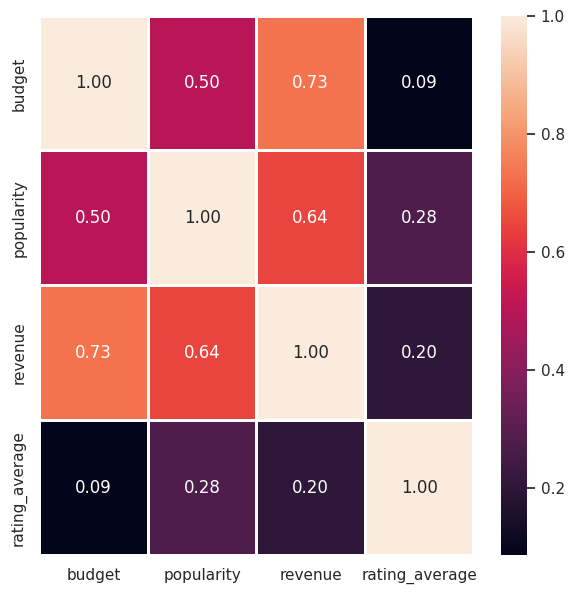

In [33]:
# plot a heatmap of correlation
#corr() is used to create the correlation matrix.
#You'll have to make sure that all the elements in the matrix are of numeric type. 
#If they are not of the numeric type you'll have to add or concat them explicitly.

sns.set(rc = {'figure.figsize': (7, 7)})
sns.heatmap(movies[['budget', 'popularity', 'revenue', 'rating_average']].corr(), 
            annot = True, fmt = '.2f', linewidth = 1);

>__NOTE__  
  
  The above chart is the heatmap genearated with seaborn, it shows the relationship between two variables or the effect of a variable on another one. We notice that more _revenue_ generated by a movie mainly depends on the budget because it has the highest impact with a score of 0.73. In the same way, more the budget is import, more the movie is like to be popular as the revenue impacts the popularity with a score of 0.64.


## Directors

__Question__ : List out the director names with number of movies and revenue

In [38]:
cursor.execute(
    "SELECT name, COUNT(original_title), SUM(revenue) FROM directors JOIN movies ON movies.director_id = directors.id GROUP BY name ORDER BY SUM(revenue) DESC"
)

directors = cursor.fetchall()

# Create a dataframe for the data
directors = pd.DataFrame(directors, columns=['name', 'number_of_movies', 'revenue'])

# Print the output
directors

,name,number_of_movies,revenue
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234
...,...,...,...
2344,Adam Green,1,0
2345,Adam Goldberg,1,0
2346,Adam Carolla,1,0
2347,Aaron Schneider,1,0


__Steven Spielberg__ is at the first place of the highest revenues with an amount of __$9,147,393,164__ and a total of 27 movies. He's followed by **Peter Jackson**, who with 9 movies got a total revenue of __$6,498,642,820__. And then **James Cameron** with __$5,883,569,439__ from his 7 movies.

**Question** : Display all the number of movies for particular director and the revenue

In [41]:
cursor.execute(
    "SELECT name, COUNT(original_title), SUM(revenue) FROM directors JOIN movies ON movies.director_id = directors.id GROUP BY name ORDER BY COUNT(original_title) DESC"
)

dir_movie_revenue = cursor.fetchall()

# Create a dataframe for the data
dir_movie_revenue = pd.DataFrame(dir_movie_revenue, columns=['name', 'number_of_movies', 'revenue'])

# Print the output
dir_movie_revenue

,name,number_of_movies,revenue
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Martin Scorsese,20,1956635998
3,Clint Eastwood,20,2512058888
4,Spike Lee,16,340618771
...,...,...,...
2344,Adam Carolla,1,0
2345,Adam Brooks,1,55447968
2346,Abel Ferrara,1,1227324
2347,Aaron Schneider,1,0


The above table displaying all directors along with their number of movies and the revenue shows that **Steven Spielberg** directed most movies, 27 movies in total. He's followed by **Woody Allen** with 21 movies and then **Martin Scorsese** and **Clint Eastwood** with 20 movies both.

**Question** : By doing Director analysis We know Steven Spielberg is the highest revenue, so list the Steven Spielberg movies info

In [47]:
cursor.execute(
    "SELECT original_title, release_date, budget, revenue, popularity, vote_average FROM movies JOIN directors ON movies.director_id = directors.id WHERE name = 'Steven Spielberg' ORDER BY release_date DESC"
)

spielger_movies = cursor.fetchall()

# Create a dataframe and print it
spielger_movies = pd.DataFrame(spielger_movies, columns=['original_title', 'release_date', 'budget', 'revenue', 'popularity', 'vote_average'])
spielger_movies

,original_title,release_date,budget,revenue,popularity,vote_average
0,The BFG,2016-06-01,140000000,183345589,44,6.0
1,Bridge of Spies,2015-10-15,40000000,165478348,48,7.2
2,Lincoln,2012-11-09,65000000,275293450,36,6.7
3,War Horse,2011-12-25,66000000,177584879,29,7.0
4,The Adventures of Tintin,2011-10-25,130000000,371940071,89,6.7
5,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,185000000,786636033,75,5.7
6,Munich,2005-12-22,70000000,130358911,29,6.9
7,War of the Worlds,2005-06-28,132000000,591739379,48,6.2
8,The Terminal,2004-06-17,60000000,219417255,57,7.0
9,Catch Me If You Can,2002-12-25,52000000,352114312,73,7.7


>__Note__  
  
  The above table displays all the movies directed by __Steven Spielberg__, sorted by the release date of each of them. The most recent movie, he directed is _The BFG_ released on __June 1st, 2016__. And the most ancient is _Jaws_ released on __June 18th, 1975__. He has directed 27 movies so far.